In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

# Configuración de estilo de gráficos
sns.set(style="whitegrid")

# DATAFRAME

https://www.datos.gov.co/Educaci-n/Cartagena_historico_saber11_13022024/vtxk-nucp/about_data

In [ ]:
cartagena = pd.read_csv('Cartagena_historico_saber11_13022024.csv')
cartagena.head()

,PERIODO,ESTU_TIPODOCUMENTO,ESTU_CONSECUTIVO,COLE_AREA_UBICACION,COLE_BILINGUE,COLE_CALENDARIO,COLE_CARACTER,COLE_COD_DANE_ESTABLECIMIENTO,COLE_COD_DANE_SEDE,COLE_COD_DEPTO_UBICACION,...,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET,FAMI_TIENELAVADORA,DESEMP_INGLES,PUNT_INGLES,PUNT_MATEMATICAS,PUNT_SOCIALES_CIUDADANAS,PUNT_C_NATURALES,PUNT_LECTURA_CRITICA,PUNT_GLOBAL
0,20152,TI,SB11201520072195,URBANO,N,A,ACADÉMICO,3.130010e+11,313001000975,13,...,Si,Si,Si,A2,59.0,65.0,57.0,48.0,53.0,280.0
1,20172,TI,SB11201720190229,URBANO,N,A,TÉCNICO/ACADÉMICO,1.130010e+11,113001002138,13,...,Si,No,Si,A-,40.0,40.0,30.0,43.0,34.0,185.0
2,20162,TI,SB11201620100498,URBANO,NaN,A,ACADÉMICO,3.130010e+11,313001029396,13,...,No,Si,Si,A-,39.0,49.0,40.0,50.0,49.0,233.0
3,20152,TI,SB11201520533906,URBANO,N,A,TÉCNICO/ACADÉMICO,1.130010e+11,113001002138,13,...,No,No,Si,A1,53.0,55.0,56.0,52.0,53.0,270.0
4,20152,TI,SB11201520240602,URBANO,N,A,TÉCNICO/ACADÉMICO,3.130010e+11,313001008411,13,...,No,No,Si,A-,46.0,44.0,39.0,43.0,50.0,221.0


In [ ]:
cartagena = cartagena[cartagena['ESTU_ESTUDIANTE'] == 'ESTUDIANTE']
cartagena = cartagena[cartagena['ESTU_NACIONALIDAD'] == 'COLOMBIA']
cartagena = cartagena[cartagena['ESTU_PAIS_RESIDE'] == 'COLOMBIA']

# Igual en todas las filas
# 'COLE_DEPTO_UBICACION' = 'BOLIVAR'
# 'COLE_MCPIO_UBICACION' = 'CARTAGENA'

cartagena = cartagena.drop(['ESTU_TIPODOCUMENTO', 'ESTU_CONSECUTIVO', 'COLE_AREA_UBICACION', 'COLE_BILINGUE', 'ESTU_COD_DEPTO_PRESENTACION',
                            'COLE_CALENDARIO', 'COLE_CARACTER', 'COLE_COD_DANE_ESTABLECIMIENTO', 'COLE_COD_DANE_SEDE',
                            'ESTU_COD_MCPIO_PRESENTACION', 'COLE_COD_DEPTO_UBICACION', 'COLE_COD_MCPIO_UBICACION', 'COLE_CODIGO_ICFES',
                            'COLE_SEDE_PRINCIPAL', 'ESTU_COD_RESIDE_DEPTO', 'COLE_JORNADA', 'COLE_GENERO', 'COLE_NOMBRE_ESTABLECIMIENTO',
                            'COLE_NOMBRE_SEDE', 'ESTU_COD_RESIDE_MCPIO', 'ESTU_DEPTO_PRESENTACION', 'DESEMP_INGLES', 'PUNT_INGLES',
                            'FAMI_TIENELAVADORA', 'ESTU_MCPIO_PRESENTACION', 'FAMI_TIENEAUTOMOVIL', 'FAMI_PERSONASHOGAR', 'FAMI_EDUCACIONMADRE',
                            'FAMI_EDUCACIONPADRE', 'FAMI_CUARTOSHOGAR', 'ESTU_PRIVADO_LIBERTAD', 'PUNT_MATEMATICAS', 'PUNT_C_NATURALES',
                            'PUNT_LECTURA_CRITICA', 'ESTU_ESTADOINVESTIGACION', 'ESTU_ESTUDIANTE', 'ESTU_NACIONALIDAD', 'ESTU_PAIS_RESIDE',
                            'COLE_NATURALEZA', 'COLE_DEPTO_UBICACION', 'COLE_MCPIO_UBICACION', 'ESTU_MCPIO_RESIDE', 'ESTU_DEPTO_RESIDE'], axis=1)

cartagena = cartagena.rename(columns={
    'PERIODO': 'Año',
    'ESTU_GENERO': 'Genero',
    'FAMI_ESTRATOVIVIENDA': 'Estrato',
    'FAMI_TIENECOMPUTADOR': 'Computador',
    'FAMI_TIENEINTERNET': 'Internet',
    'PUNT_SOCIALES_CIUDADANAS': 'Punt_Soci_Ciud',
    'PUNT_GLOBAL': 'Punt_Global',
})

cartagena = cartagena[cartagena['Estrato'] != 'Sin Estrato']

replacements = {
    'Estrato 1': 1,
    'Estrato 2': 2,
    'Estrato 3': 3,
    'Estrato 4': 4,
    'Estrato 5': 5,
    'Estrato 6': 6
}

cartagena['Estrato'] = cartagena['Estrato'].replace(replacements)

cartagena = cartagena.dropna()

cartagena['Estrato'] = cartagena['Estrato'].astype(int)

# Proceso para calcular la edad
cartagena['ESTU_FECHANACIMIENTO'] = pd.to_datetime(cartagena['ESTU_FECHANACIMIENTO'], format='%d/%m/%Y', errors='coerce')
cartagena = cartagena.dropna(subset=['ESTU_FECHANACIMIENTO'])

<ipython-input-227-84f1a1d30f5e>:40: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cartagena['Estrato'] = cartagena['Estrato'].replace(replacements)
<ipython-input-227-84f1a1d30f5e>:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cartagena['Estrato'] = cartagena['Estrato'].astype(int)


In [ ]:
cartagena['temporal'] = cartagena['ESTU_FECHANACIMIENTO']
cartagena['temporal'] = cartagena['temporal'].astype(str)
cartagena['temporal'] = cartagena['temporal'].str[:4]
cartagena['temporal'] = cartagena['temporal'].astype(int)

cartagena['Año'] = cartagena['Año'].astype(str)
cartagena['Año'] = cartagena['Año'].str[:4]
cartagena['Año'] = cartagena['Año'].astype(int)

cartagena['Edad'] = cartagena['Año'] - cartagena['temporal']

cartagena = cartagena.drop(['temporal', 'ESTU_FECHANACIMIENTO'], axis=1)

cartagena = cartagena[cartagena['Edad'] >= 10]
cartagena = cartagena[cartagena['Edad'] <= 30]

cartagena.head()

<ipython-input-228-9f26545d3339>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cartagena['temporal'] = cartagena['ESTU_FECHANACIMIENTO']
<ipython-input-228-9f26545d3339>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cartagena['temporal'] = cartagena['temporal'].astype(str)
<ipython-input-228-9f26545d3339>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

,Año,Genero,Estrato,Computador,Internet,Punt_Soci_Ciud,Punt_Global,Edad
0,2015,F,3,Si,Si,57.0,280.0,16
1,2017,F,1,Si,No,30.0,185.0,18
2,2016,F,1,No,Si,40.0,233.0,17
3,2015,M,1,No,No,56.0,270.0,16
4,2015,M,1,No,No,39.0,221.0,16


# GRÁFICAS (2014-2022)

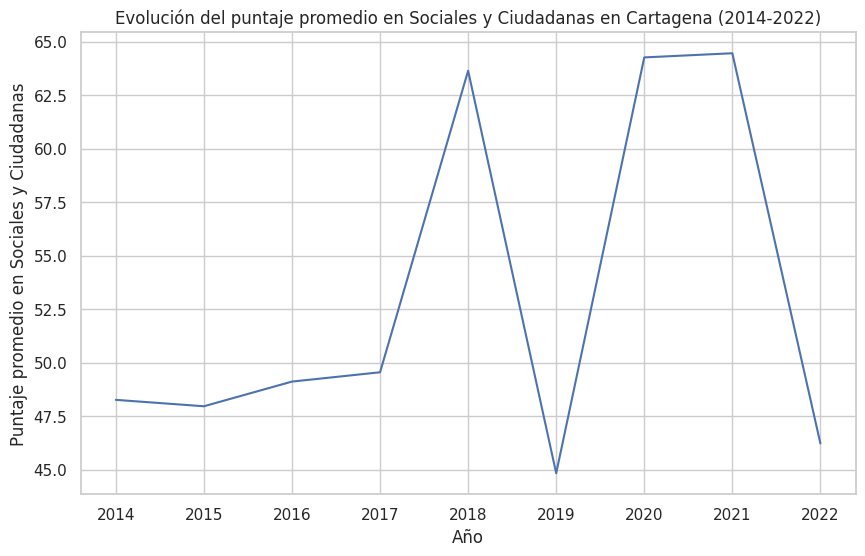

In [ ]:
yearly_scores = cartagena.groupby('Año')['Punt_Soci_Ciud'].mean()
plt.figure(figsize=(10, 6))
yearly_scores.plot(kind='line')
plt.title("Evolución del puntaje promedio en Sociales y Ciudadanas en Cartagena (2014-2022)")
plt.xlabel("Año")
plt.ylabel("Puntaje promedio en Sociales y Ciudadanas")
plt.show()

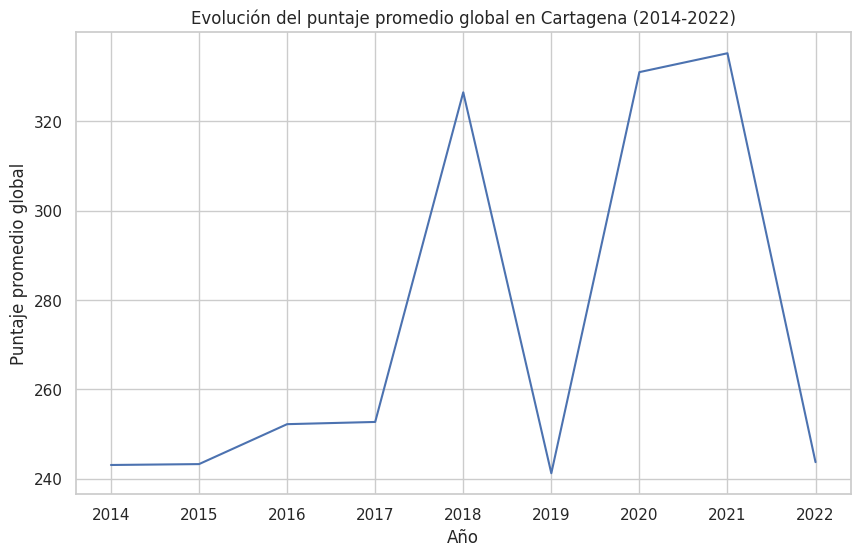

In [ ]:
yearly_scores = cartagena.groupby('Año')['Punt_Global'].mean()
plt.figure(figsize=(10, 6))
yearly_scores.plot(kind='line')
plt.title("Evolución del puntaje promedio global en Cartagena (2014-2022)")
plt.xlabel("Año")
plt.ylabel("Puntaje promedio global")
plt.show()

# GRÁFICAS 2014

In [ ]:
cartagena_2014 = cartagena[cartagena['Año'] == 2014]
cartagena_2014.head()

,Año,Genero,Estrato,Computador,Internet,Punt_Soci_Ciud,Punt_Global,Edad
6,2014,M,2,No,No,65.0,273.0,16
10,2014,M,2,No,No,51.0,230.0,19
20,2014,F,3,Si,Si,52.0,250.0,17
21,2014,M,3,Si,Si,65.0,346.0,17
23,2014,F,1,Si,Si,52.0,250.0,16


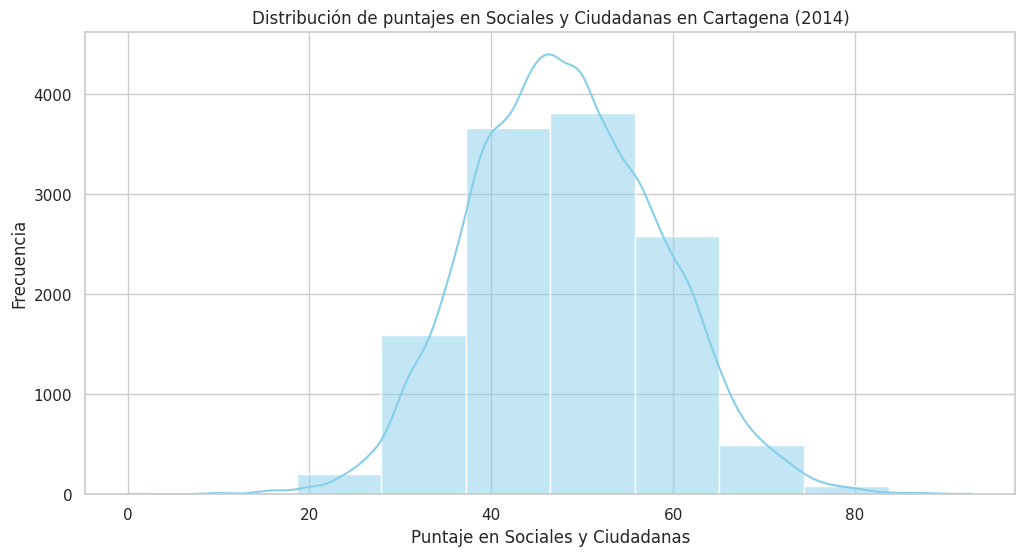

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(data=cartagena_2014, x="Punt_Soci_Ciud", bins=10, kde=True, color="skyblue")
plt.title("Distribución de puntajes en Sociales y Ciudadanas en Cartagena (2014)")
plt.xlabel("Puntaje en Sociales y Ciudadanas")
plt.ylabel("Frecuencia")
plt.show()

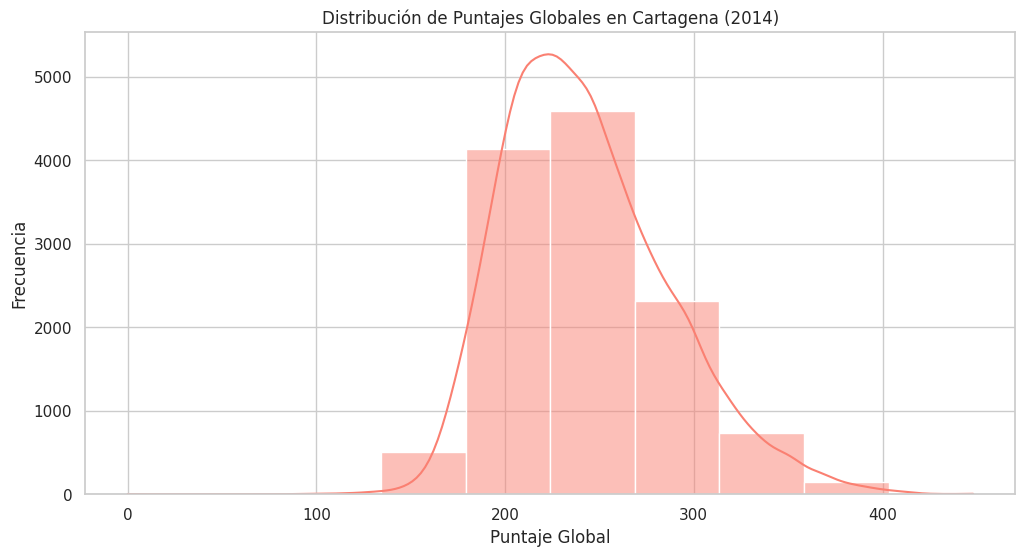

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(data=cartagena_2014, x="Punt_Global", bins=10, kde=True, color="salmon")
plt.title("Distribución de Puntajes Globales en Cartagena (2014)")
plt.xlabel("Puntaje Global")
plt.ylabel("Frecuencia")
plt.show()

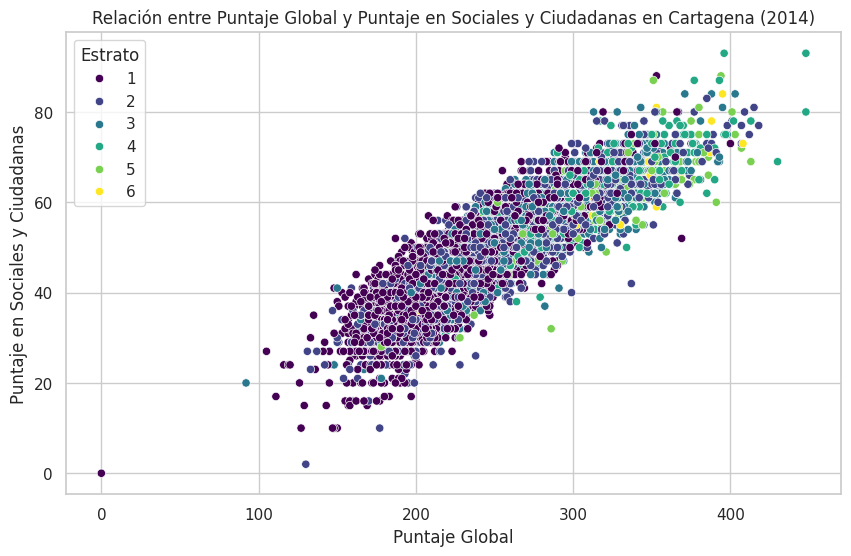

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Punt_Global', y='Punt_Soci_Ciud', data=cartagena_2014, hue='Estrato', palette="viridis")
plt.title("Relación entre Puntaje Global y Puntaje en Sociales y Ciudadanas en Cartagena (2014)")
plt.xlabel("Puntaje Global")
plt.ylabel("Puntaje en Sociales y Ciudadanas")
plt.legend(title="Estrato")
plt.show()

<ipython-input-215-69b20d4a72e4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Internet', y='Punt_Global', data=cartagena_2014, palette="coolwarm")


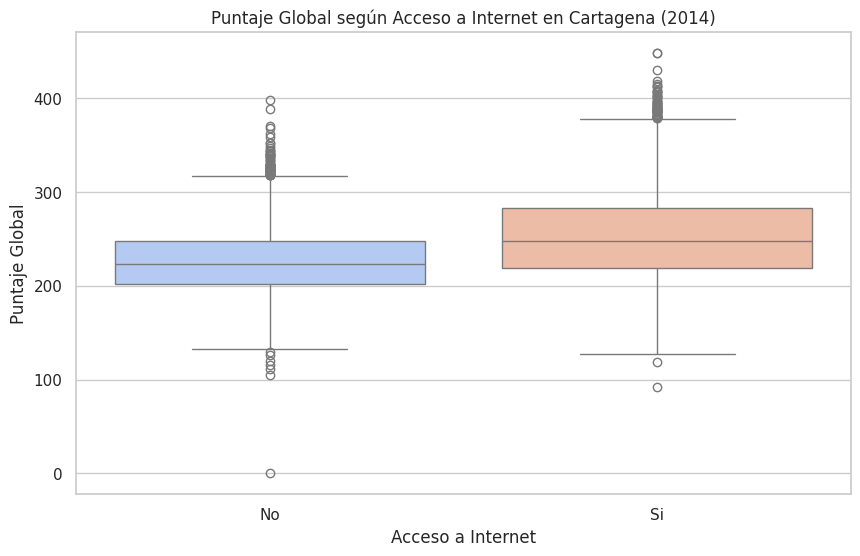

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Internet', y='Punt_Global', data=cartagena_2014, palette="coolwarm")
plt.title("Puntaje Global según Acceso a Internet en Cartagena (2014)")
plt.xlabel("Acceso a Internet")
plt.ylabel("Puntaje Global")
plt.show()

<ipython-input-216-d0a7996ffb74>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Computador', y='Punt_Soci_Ciud', data=cartagena_2014, palette="pastel")


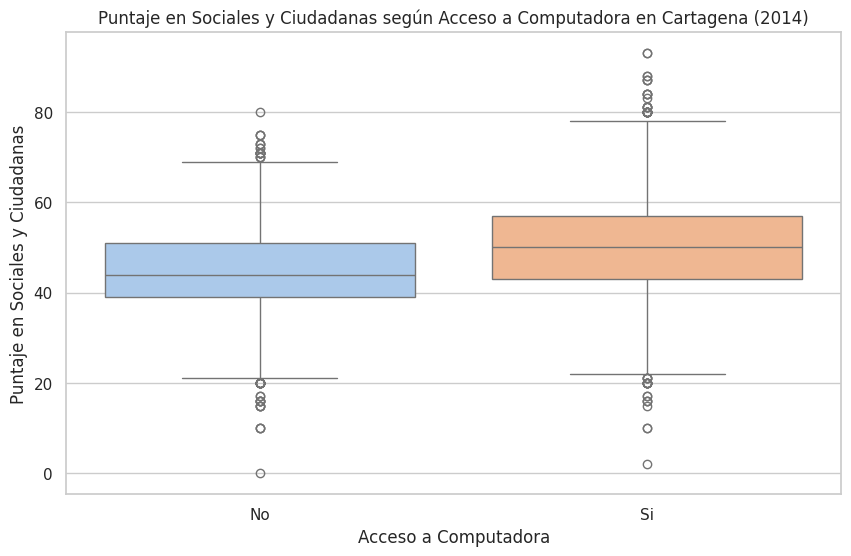

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Computador', y='Punt_Soci_Ciud', data=cartagena_2014, palette="pastel")
plt.title("Puntaje en Sociales y Ciudadanas según Acceso a Computadora en Cartagena (2014)")
plt.xlabel("Acceso a Computadora")
plt.ylabel("Puntaje en Sociales y Ciudadanas")
plt.show()

# GRÁFICAS 2022

In [ ]:
cartagena_2022 = cartagena[cartagena['Año'] == 2022]
cartagena_2022.head()

,Año,Genero,Estrato,Computador,Internet,Punt_Soci_Ciud,Punt_Global,Edad
68056,2022,M,4,No,No,26.0,205.0,18
70181,2022,F,2,Si,Si,43.0,258.0,17
71215,2022,M,2,Si,Si,31.0,174.0,17
71263,2022,M,3,No,No,37.0,248.0,17
73513,2022,M,4,Si,Si,70.0,368.0,15


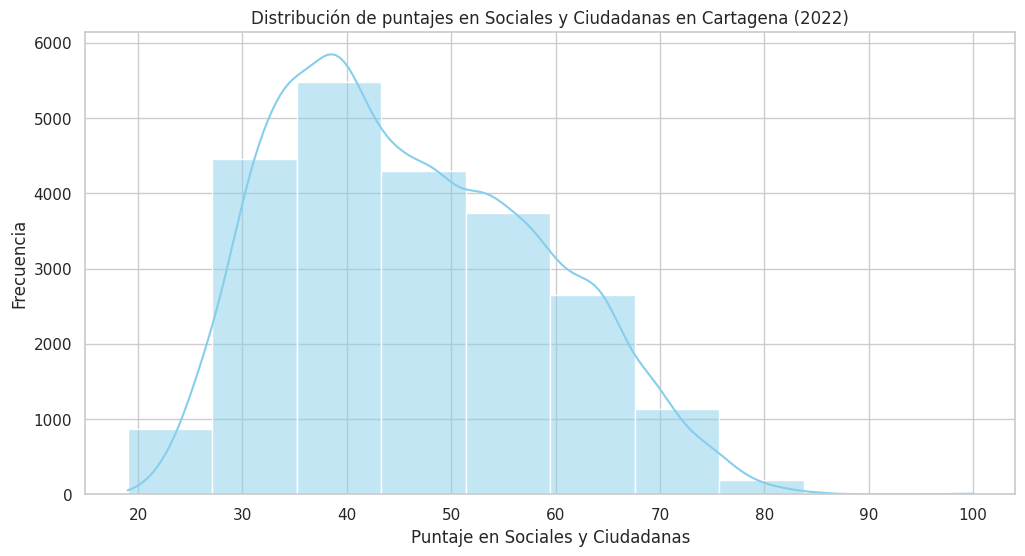

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(data=cartagena_2022, x="Punt_Soci_Ciud", bins=10, kde=True, color="skyblue")
plt.title("Distribución de puntajes en Sociales y Ciudadanas en Cartagena (2022)")
plt.xlabel("Puntaje en Sociales y Ciudadanas")
plt.ylabel("Frecuencia")
plt.show()

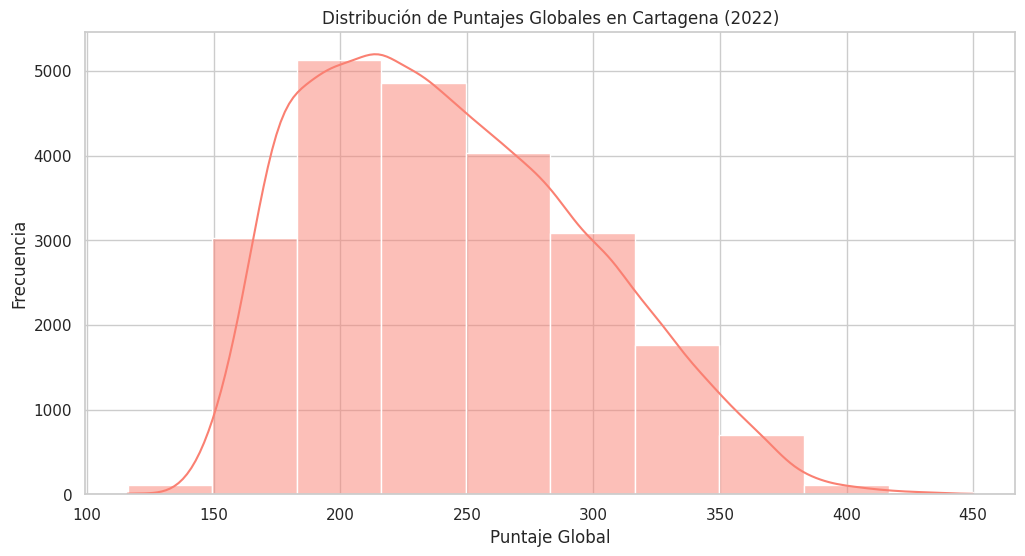

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(data=cartagena_2022, x="Punt_Global", bins=10, kde=True, color="salmon")
plt.title("Distribución de Puntajes Globales en Cartagena (2022)")
plt.xlabel("Puntaje Global")
plt.ylabel("Frecuencia")
plt.show()

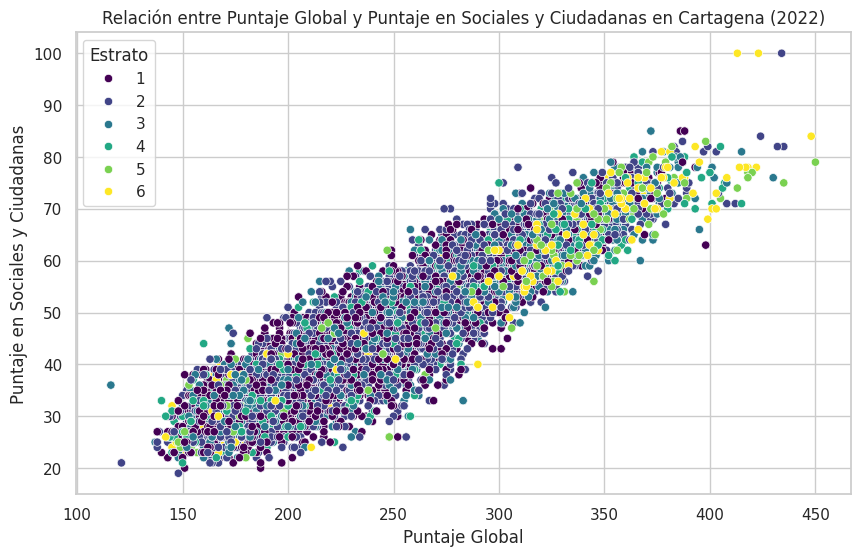

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Punt_Global', y='Punt_Soci_Ciud', data=cartagena_2022, hue='Estrato', palette="viridis")
plt.title("Relación entre Puntaje Global y Puntaje en Sociales y Ciudadanas en Cartagena (2022)")
plt.xlabel("Puntaje Global")
plt.ylabel("Puntaje en Sociales y Ciudadanas")
plt.legend(title="Estrato")
plt.show()

<ipython-input-221-2704a59bafb6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Internet', y='Punt_Global', data=cartagena_2022, palette="coolwarm")


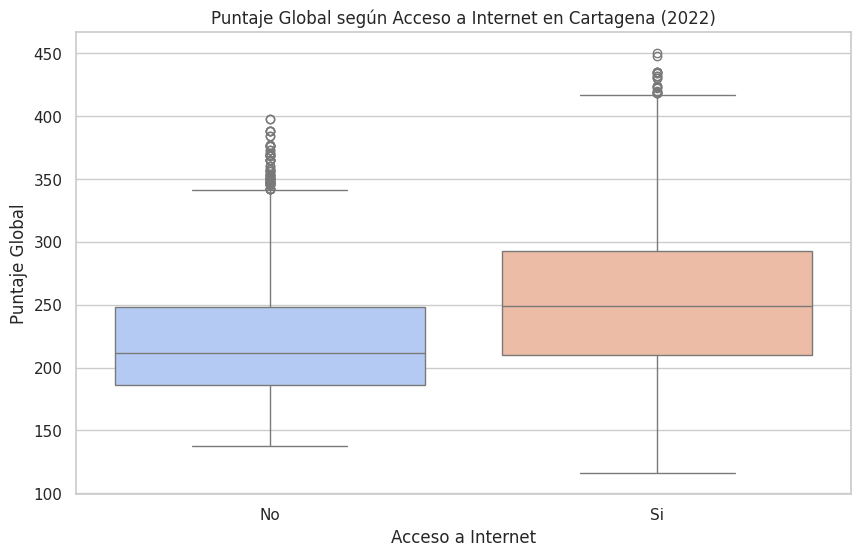

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Internet', y='Punt_Global', data=cartagena_2022, palette="coolwarm")
plt.title("Puntaje Global según Acceso a Internet en Cartagena (2022)")
plt.xlabel("Acceso a Internet")
plt.ylabel("Puntaje Global")
plt.show()

<ipython-input-222-f76fc0a6260e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Computador', y='Punt_Soci_Ciud', data=cartagena_2022, palette="pastel")


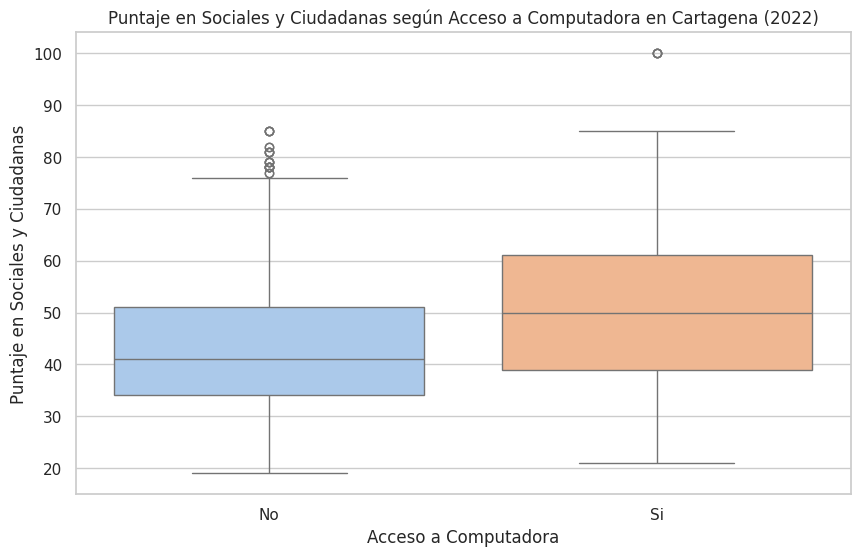

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Computador', y='Punt_Soci_Ciud', data=cartagena_2022, palette="pastel")
plt.title("Puntaje en Sociales y Ciudadanas según Acceso a Computadora en Cartagena (2022)")
plt.xlabel("Acceso a Computadora")
plt.ylabel("Puntaje en Sociales y Ciudadanas")
plt.show()

# TABLAS (2014-2022)

In [ ]:
estrato_summary = cartagena.groupby('Estrato')[['Punt_Soci_Ciud', 'Punt_Global']].agg(['mean', 'median']).reset_index()

estrato_summary.columns = [
    'Estrato',
    'Puntaje en Sociales y Ciudadanas (Promedio)',
    'Puntaje en Sociales y Ciudadanas (Mediana)',
    'Puntaje Global (Promedio)',
    'Puntaje Global (Mediana)'
]

print(tabulate(estrato_summary, headers='keys', tablefmt='fancy_grid', showindex=False))

╒═══════════╤═══════════════════════════════════════════════╤══════════════════════════════════════════════╤═════════════════════════════╤════════════════════════════╕
│   Estrato │   Puntaje en Sociales y Ciudadanas (Promedio) │   Puntaje en Sociales y Ciudadanas (Mediana) │   Puntaje Global (Promedio) │   Puntaje Global (Mediana) │
╞═══════════╪═══════════════════════════════════════════════╪══════════════════════════════════════════════╪═════════════════════════════╪════════════════════════════╡
│         1 │                                       44.4282 │                                           44 │                     231.023 │                      227   │
├───────────┼───────────────────────────────────────────────┼──────────────────────────────────────────────┼─────────────────────────────┼────────────────────────────┤
│         2 │                                       47.987  │                                           47 │                     249.364 │                      

In [ ]:
comp_access_summary = cartagena.groupby(['Computador', 'Internet'])[['Punt_Soci_Ciud', 'Punt_Global']].mean().reset_index()


comp_access_summary.columns = [
    'Acceso a Computador',
    'Acceso a Internet',
    'Puntaje en Sociales y Ciudadanas (Promedio)',
    'Puntaje Global (Promedio)'
]

print(tabulate(comp_access_summary, headers='keys', tablefmt='fancy_grid', showindex=False))

╒═══════════════════════╤═════════════════════╤═══════════════════════════════════════════════╤═════════════════════════════╕
│ Acceso a Computador   │ Acceso a Internet   │   Puntaje en Sociales y Ciudadanas (Promedio) │   Puntaje Global (Promedio) │
╞═══════════════════════╪═════════════════════╪═══════════════════════════════════════════════╪═════════════════════════════╡
│ No                    │ No                  │                                       42.9244 │                     224.406 │
├───────────────────────┼─────────────────────┼───────────────────────────────────────────────┼─────────────────────────────┤
│ No                    │ Si                  │                                       45.301  │                     238.517 │
├───────────────────────┼─────────────────────┼───────────────────────────────────────────────┼─────────────────────────────┤
│ Si                    │ No                  │                                       45.2395 │                     23

In [ ]:
age_gender_summary = cartagena.groupby(['Edad'])[['Punt_Soci_Ciud', 'Punt_Global']].agg(['mean', 'std']).reset_index()

age_gender_summary.columns = [
    'Edad',
    'Puntaje en Sociales y Ciudadanas (Promedio)',
    'Desviación Puntaje Sociales y Ciudadanas',
    'Puntaje Global (Promedio)',
    'Desviación Puntaje Global'
]

print(tabulate(age_gender_summary, headers='keys', tablefmt='fancy_grid', showindex=False))

╒════════╤═══════════════════════════════════════════════╤════════════════════════════════════════════╤═════════════════════════════╤═════════════════════════════╕
│   Edad │   Puntaje en Sociales y Ciudadanas (Promedio) │   Desviación Puntaje Sociales y Ciudadanas │   Puntaje Global (Promedio) │   Desviación Puntaje Global │
╞════════╪═══════════════════════════════════════════════╪════════════════════════════════════════════╪═════════════════════════════╪═════════════════════════════╡
│     10 │                                       49.5714 │                                   11.2969  │                     245.143 │                    41.9819  │
├────────┼───────────────────────────────────────────────┼────────────────────────────────────────────┼─────────────────────────────┼─────────────────────────────┤
│     11 │                                       37.2    │                                    3.34664 │                     201.6   │                     3.50714 │
├────────┼──────